In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

import gradio as gr

In [2]:
df= pd.read_csv('baby-weights-dataset.csv')
df

,ID,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,...,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE,BWEIGHT
0,2001,2,1,33,26.0,10,34,12.0,4,2,...,0,0,0,0,0,0,0,0,0,4.3750
1,2002,2,2,19,40.0,10,18,11.0,12,1,...,0,0,0,0,0,0,0,0,0,6.9375
2,2003,2,1,33,16.0,14,31,16.0,16,2,...,0,0,0,0,0,0,0,0,0,8.5000
3,2004,1,1,25,40.0,15,28,12.0,12,3,...,0,0,0,0,0,0,0,0,0,8.5000
4,2005,1,2,21,60.0,13,20,12.0,14,2,...,0,1,0,0,0,0,0,0,0,9.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101395,103396,1,2,36,0.0,9,34,3.0,12,4,...,0,0,0,0,0,0,0,0,0,9.1250
101396,103397,2,2,21,39.0,11,19,12.0,9,2,...,0,0,0,0,0,0,0,0,0,7.3750
101397,103398,2,1,27,37.0,15,22,12.0,12,2,...,0,0,0,0,0,0,0,0,0,7.5000
101398,103399,1,1,27,26.0,12,24,12.0,14,1,...,0,0,0,0,0,0,0,0,0,7.6250


In [3]:
df.isna().sum()

ID          0
SEX         0
MARITAL     0
FAGE        0
GAINED      1
VISITS      0
MAGE        0
FEDUC       1
MEDUC       0
TOTALP      0
BDEAD       0
TERMS       0
LOUTCOME    0
WEEKS       1
RACEMOM     0
RACEDAD     0
HISPMOM     0
HISPDAD     0
CIGNUM      1
DRINKNUM    0
ANEMIA      0
CARDIAC     0
ACLUNG      0
DIABETES    0
HERPES      0
HYDRAM      1
HEMOGLOB    0
HYPERCH     0
HYPERPR     0
ECLAMP      0
CERVIX      0
PINFANT     0
PRETERM     0
RENAL       0
RHSEN       0
UTERINE     0
BWEIGHT     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101400 entries, 0 to 101399
Data columns (total 37 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   ID        101400 non-null  int64  
 1   SEX       101400 non-null  int64  
 2   MARITAL   101400 non-null  int64  
 3   FAGE      101400 non-null  int64  
 4   GAINED    101399 non-null  float64
 5   VISITS    101400 non-null  int64  
 6   MAGE      101400 non-null  int64  
 7   FEDUC     101399 non-null  float64
 8   MEDUC     101400 non-null  int64  
 9   TOTALP    101400 non-null  int64  
 10  BDEAD     101400 non-null  int64  
 11  TERMS     101400 non-null  int64  
 12  LOUTCOME  101400 non-null  int64  
 13  WEEKS     101399 non-null  float64
 14  RACEMOM   101400 non-null  int64  
 15  RACEDAD   101400 non-null  int64  
 16  HISPMOM   101400 non-null  object 
 17  HISPDAD   101400 non-null  object 
 18  CIGNUM    101399 non-null  float64
 19  DRINKNUM  101400 non-null  int64  
 20  ANEM

In [5]:
df.describe()

,ID,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,...,HYPERCH,HYPERPR,ECLAMP,CERVIX,PINFANT,PRETERM,RENAL,RHSEN,UTERINE,BWEIGHT
count,101400.000000,101400.000000,101400.000000,101400.000000,101399.000000,101400.000000,101400.000000,101399.000000,101400.000000,101400.000000,...,101400.000000,101400.000000,101400.000000,101400.000000,101400.000000,101400.000000,101400.000000,101400.000000,101400.000000,101400.000000
mean,52700.500000,1.485671,1.303817,30.174477,30.283040,12.436943,27.736312,12.926883,13.256489,2.378462,...,0.013767,0.050039,0.003807,0.003738,0.005680,0.008856,0.002189,0.003777,0.003442,7.258066
std,29271.802985,0.500349,0.459907,6.775576,13.615468,3.728901,5.957369,2.926582,2.932693,1.490272,...,0.116524,0.218027,0.061581,0.061022,0.075155,0.093689,0.046739,0.061342,0.058566,1.329461
min,2001.000000,1.000000,1.000000,14.000000,0.000000,0.000000,11.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.187500
25%,27350.750000,1.000000,1.000000,25.000000,21.000000,10.000000,23.000000,12.000000,12.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.625000
50%,52700.500000,1.000000,1.000000,30.000000,30.000000,12.000000,28.000000,12.000000,13.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.375000
75%,78050.250000,2.000000,2.000000,35.000000,39.000000,15.000000,32.000000,16.000000,16.000000,3.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.062500
max,103400.000000,9.000000,2.000000,74.000000,98.000000,49.000000,53.000000,17.000000,17.000000,20.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,13.062500


In [6]:
df.shape

(101400, 37)

In [7]:
# Simple imputation for missing values
df['GAINED'].fillna(df['GAINED'].median(), inplace=True)
df['FEDUC'].fillna(df['FEDUC'].mode()[0], inplace=True)
df['WEEKS'].fillna(df['WEEKS'].median(), inplace=True)
df['CIGNUM'].fillna(0, inplace=True)
df['HYDRAM'].fillna(0, inplace=True)

In [8]:
df.shape

(101400, 37)

In [9]:
df.nunique()

ID          101400
SEX              3
MARITAL          2
FAGE            59
GAINED          99
VISITS          45
MAGE            42
FEDUC           18
MEDUC           18
TOTALP          20
BDEAD            7
TERMS           16
LOUTCOME         3
WEEKS           28
RACEMOM          9
RACEDAD         10
HISPMOM          7
HISPDAD          7
CIGNUM          33
DRINKNUM        14
ANEMIA           2
CARDIAC          2
ACLUNG           2
DIABETES         2
HERPES           2
HYDRAM           2
HEMOGLOB         2
HYPERCH          2
HYPERPR          2
ECLAMP           2
CERVIX           2
PINFANT          2
PRETERM          2
RENAL            2
RHSEN            2
UTERINE          2
BWEIGHT        198
dtype: int64

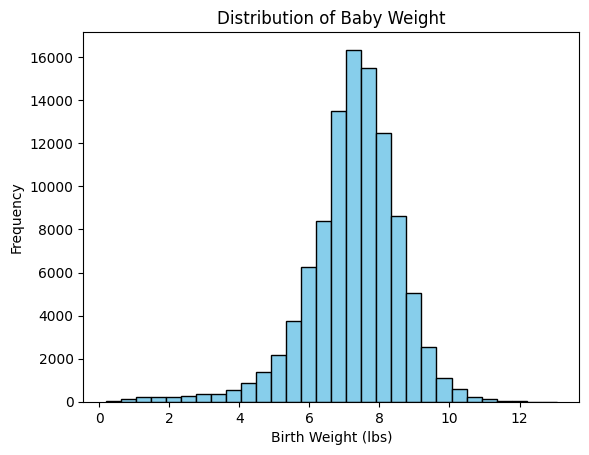

In [10]:
plt.hist(df['BWEIGHT'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Baby Weight')
plt.xlabel('Birth Weight (lbs)')
plt.ylabel('Frequency')
plt.show()

In [11]:
df['SEX'].unique()

array([2, 1, 9], dtype=int64)

In [12]:
df['SEX'].value_counts()

1    52160
2    49239
9        1
Name: SEX, dtype: int64

In [13]:
df = df[df['SEX'] != 9]

In [14]:
df['SEX'].value_counts()

1    52160
2    49239
Name: SEX, dtype: int64

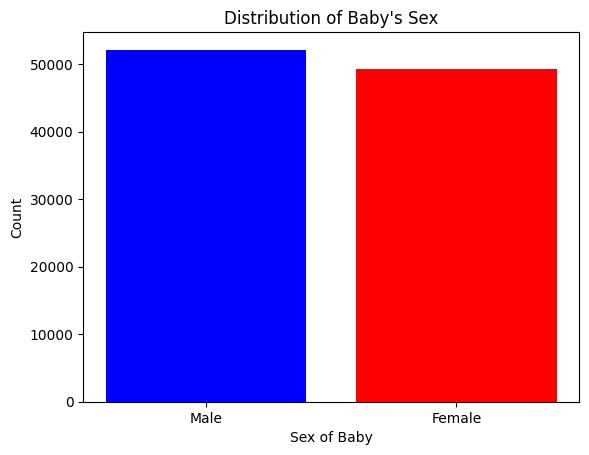

In [15]:
vc = df['SEX'].value_counts()

# Mapping values to labels
labels = {1: "Male", 2: "Female"}
vc.index = vc.index.map(labels)

plt.bar(vc.index, height=vc, color=['b', 'r'])  # Blue for Male, Red for Female, Gray for Unknown
plt.xlabel("Sex of Baby")
plt.ylabel("Count")
plt.title("Distribution of Baby's Sex")
plt.show()

C:\Users\sonaw\AppData\Local\Temp\ipykernel_19748\1752605304.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['BWEIGHT_BINNED'] = pd.cut(df['BWEIGHT'], bins=bins, labels=labels, right=False)


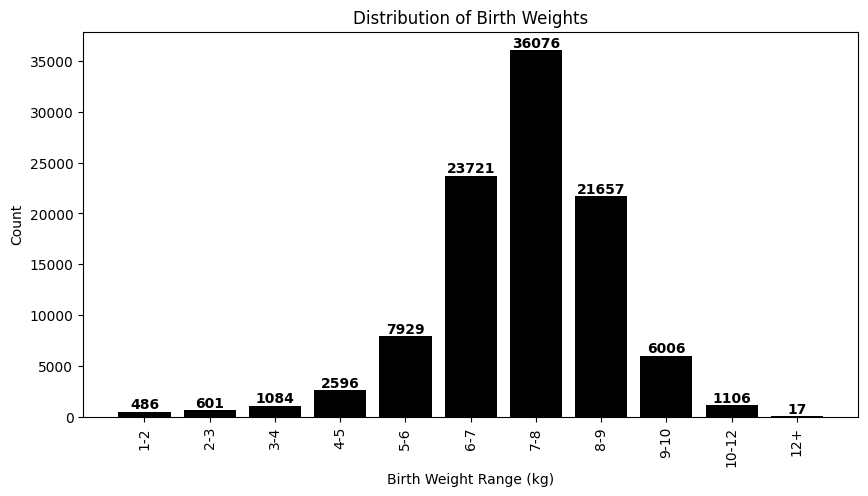

In [16]:
# Define weight bins
bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 12, df['BWEIGHT'].max()]  # Last bin covers any weight >12
labels = ["1-2", "2-3", "3-4", "4-5", "5-6", "6-7", "7-8", "8-9", "9-10", "10-12", "12+"]

# Create binned categories
df['BWEIGHT_BINNED'] = pd.cut(df['BWEIGHT'], bins=bins, labels=labels, right=False)

# Count occurrences in each bin
vc = df['BWEIGHT_BINNED'].value_counts().sort_index()

# Plot
plt.figure(figsize=(10, 5))
bars = plt.bar(vc.index, vc.values, color='black')

# Add count labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height, str(height), ha='center', va='bottom', fontsize=10, fontweight='bold')

plt.xlabel("Birth Weight Range (kg)")
plt.ylabel("Count")
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title("Distribution of Birth Weights")
plt.show()

C:\Users\sonaw\AppData\Local\Temp\ipykernel_19748\4134074793.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


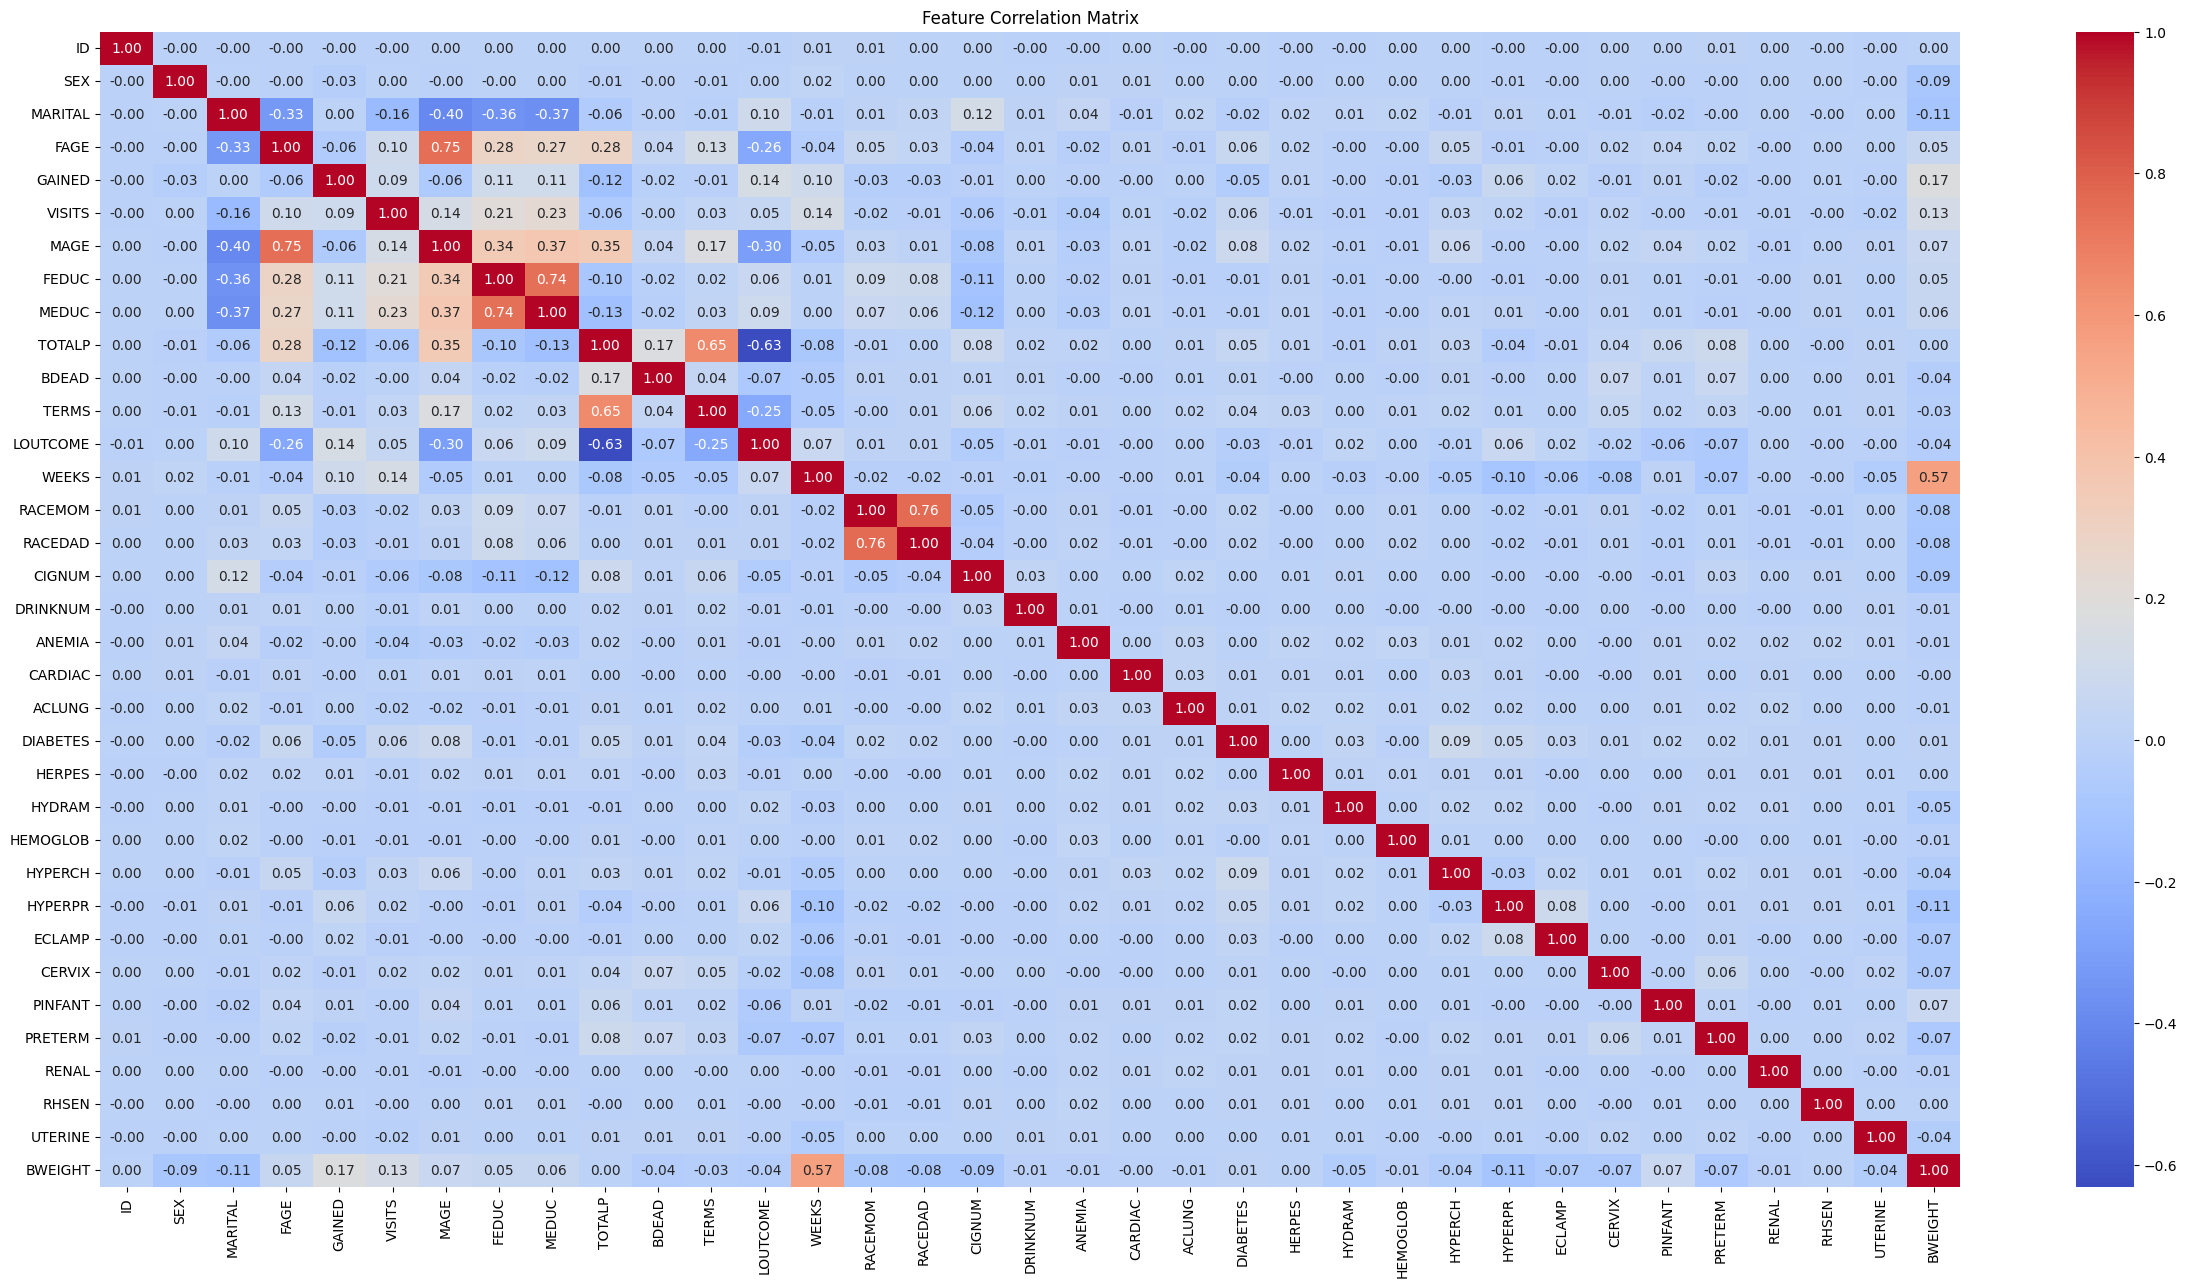

In [17]:
import seaborn as sns
corr_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(30,15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

In [18]:
df=df.drop(columns=['ID'])  # ID is not useful

In [19]:
categorical_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [20]:
df

,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,BDEAD,...,HISPMOM_O,HISPMOM_P,HISPMOM_S,HISPMOM_U,HISPDAD_M,HISPDAD_N,HISPDAD_O,HISPDAD_P,HISPDAD_S,HISPDAD_U
0,2,1,33,26.0,10,34,12.0,4,2,0,...,0,0,0,0,1,0,0,0,0,0
1,2,2,19,40.0,10,18,11.0,12,1,0,...,0,0,0,0,0,1,0,0,0,0
2,2,1,33,16.0,14,31,16.0,16,2,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,25,40.0,15,28,12.0,12,3,0,...,0,0,0,0,0,1,0,0,0,0
4,1,2,21,60.0,13,20,12.0,14,2,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101395,1,2,36,0.0,9,34,3.0,12,4,0,...,0,0,0,0,1,0,0,0,0,0
101396,2,2,21,39.0,11,19,12.0,9,2,0,...,0,0,0,0,0,1,0,0,0,0
101397,2,1,27,37.0,15,22,12.0,12,2,0,...,0,0,0,0,0,1,0,0,0,0
101398,1,1,27,26.0,12,24,12.0,14,1,0,...,0,0,0,0,0,1,0,0,0,0


In [21]:
print("Original shape:", df.shape)

Original shape: (101399, 47)


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 101399 entries, 0 to 101399
Data columns (total 47 columns):
 #   Column          Non-Null Count   Dtype   
---  ------          --------------   -----   
 0   SEX             101399 non-null  int64   
 1   MARITAL         101399 non-null  int64   
 2   FAGE            101399 non-null  int64   
 3   GAINED          101399 non-null  float64 
 4   VISITS          101399 non-null  int64   
 5   MAGE            101399 non-null  int64   
 6   FEDUC           101399 non-null  float64 
 7   MEDUC           101399 non-null  int64   
 8   TOTALP          101399 non-null  int64   
 9   BDEAD           101399 non-null  int64   
 10  TERMS           101399 non-null  int64   
 11  LOUTCOME        101399 non-null  int64   
 12  WEEKS           101399 non-null  float64 
 13  RACEMOM         101399 non-null  int64   
 14  RACEDAD         101399 non-null  int64   
 15  CIGNUM          101399 non-null  float64 
 16  DRINKNUM        101399 non-null  int64

In [23]:
df=df.drop('BWEIGHT_BINNED', axis=1)

In [24]:
df=df.drop('TERMS', axis=1)

In [25]:
from sklearn.model_selection import train_test_split

X = df.drop('BWEIGHT', axis=1)
y = df['BWEIGHT']


In [26]:
X

,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,BDEAD,...,HISPMOM_O,HISPMOM_P,HISPMOM_S,HISPMOM_U,HISPDAD_M,HISPDAD_N,HISPDAD_O,HISPDAD_P,HISPDAD_S,HISPDAD_U
0,2,1,33,26.0,10,34,12.0,4,2,0,...,0,0,0,0,1,0,0,0,0,0
1,2,2,19,40.0,10,18,11.0,12,1,0,...,0,0,0,0,0,1,0,0,0,0
2,2,1,33,16.0,14,31,16.0,16,2,0,...,0,0,0,0,0,1,0,0,0,0
3,1,1,25,40.0,15,28,12.0,12,3,0,...,0,0,0,0,0,1,0,0,0,0
4,1,2,21,60.0,13,20,12.0,14,2,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101395,1,2,36,0.0,9,34,3.0,12,4,0,...,0,0,0,0,1,0,0,0,0,0
101396,2,2,21,39.0,11,19,12.0,9,2,0,...,0,0,0,0,0,1,0,0,0,0
101397,2,1,27,37.0,15,22,12.0,12,2,0,...,0,0,0,0,0,1,0,0,0,0
101398,1,1,27,26.0,12,24,12.0,14,1,0,...,0,0,0,0,0,1,0,0,0,0


In [27]:
features = [
    'GAINED',    # Weight gain during pregnancy
    'WEEKS',     # Completed weeks of gestation
    'FAGE',      # Father’s age
    'MAGE',      # Mother’s age
    'FEDUC',     # Father’s education
    'MEDUC',     # Mother’s education
    'TOTALP',    # Total prior births
    'SEX',       # Baby’s sex
    'RACEMOM',   # Race of Mom
    'RACEDAD',   # Race of Dad
    'MARITAL',   # Marital status
    'CIGNUM',    # Average number of cigarettes used daily (Mother)
    'DRINKNUM',  # Average number of drinks used daily (mother)
]

In [28]:
#X=X.values
#y=y.values

In [29]:
print(X.shape)  # Should match the shape during scaler training

(101399, 44)


In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
X_train_selected = X_train[features]
X_test_selected = X_test[features]

In [32]:
X_train

,SEX,MARITAL,FAGE,GAINED,VISITS,MAGE,FEDUC,MEDUC,TOTALP,BDEAD,...,HISPMOM_O,HISPMOM_P,HISPMOM_S,HISPMOM_U,HISPDAD_M,HISPDAD_N,HISPDAD_O,HISPDAD_P,HISPDAD_S,HISPDAD_U
86975,1,1,34,22.0,15,32,16.0,16,1,0,...,0,0,0,0,0,1,0,0,0,0
68853,1,2,21,8.0,20,17,12.0,12,1,0,...,0,0,0,0,0,1,0,0,0,0
98820,1,1,23,27.0,40,19,14.0,12,1,0,...,0,0,0,0,0,1,0,0,0,0
52730,2,2,27,35.0,13,23,16.0,16,1,0,...,0,0,0,0,0,1,0,0,0,0
100541,2,1,25,30.0,15,24,13.0,15,1,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,2,1,34,40.0,14,36,12.0,17,4,0,...,0,0,0,0,0,1,0,0,0,0
54886,1,1,25,37.0,13,25,16.0,16,2,0,...,0,0,0,0,0,1,0,0,0,0
76820,1,1,30,35.0,15,26,16.0,17,1,0,...,0,0,0,0,0,1,0,0,0,0
860,1,1,33,21.0,12,33,16.0,16,3,0,...,0,0,0,0,0,1,0,0,0,0


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.fit_transform(X_train_selected)
X_test_scaled = scaler.transform(X_test_selected)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lr = LinearRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

print("Linear Regression:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R^2 Score:", r2_score(y_test, y_pred))

Linear Regression:
RMSE: 1.0543360801832495
R^2 Score: 0.36343175818713946


In [46]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.7, 0.8, 1.0]
}

# Initialize model
gbr = GradientBoostingRegressor(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=gbr, param_grid=param_grid, cv=5,
                           scoring='r2', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best model
best_gbr = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predictions
y_train_pred_gbr = best_gbr.predict(X_train_scaled)
y_test_pred_gbr = best_gbr.predict(X_test_scaled)

# Evaluation
print("\nGradient Boosting (Training):")
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_gbr)))
print("R^2 Score:", r2_score(y_train, y_train_pred_gbr))

print("\nGradient Boosting (Testing):")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_gbr)))
print("R^2 Score:", r2_score(y_test, y_test_pred_gbr))

Fitting 5 folds for each of 54 candidates, totalling 270 fits
Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.7}

Gradient Boosting (Training):
RMSE: 0.9855786420317626
R^2 Score: 0.45200659367804974

Gradient Boosting (Testing):
RMSE: 0.9964208698214194
R^2 Score: 0.43144502899427095


In [47]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize model
xgb = XGBRegressor(random_state=42, verbosity=0)

# GridSearchCV
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5,
                           scoring='r2', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best model
best_xgb = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predictions
y_train_pred_xgb = best_xgb.predict(X_train_scaled)
y_test_pred_xgb = best_xgb.predict(X_test_scaled)

# Evaluation
print("\nXGBoost (Training):")
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_xgb)))
print("R^2 Score:", r2_score(y_train, y_train_pred_xgb))

print("\nXGBoost (Testing):")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_xgb)))
print("R^2 Score:", r2_score(y_test, y_test_pred_xgb))

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Best Parameters: {'colsample_bytree': 0.6, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.8}

XGBoost (Training):
RMSE: 0.9793874290823636
R^2 Score: 0.4588697448285938

XGBoost (Testing):
RMSE: 0.9955193046324387
R^2 Score: 0.4324734247034441


In [48]:
# Parameter grid
param_grid = {
    'max_depth': [None, 5, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Initialize model
dt = DecisionTreeRegressor(random_state=42)

# GridSearchCV
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5,
                           scoring='r2', n_jobs=-1, verbose=2)

# Fit model
grid_search.fit(X_train_scaled, y_train)

# Best model
best_dt = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predictions
y_train_pred_dt = best_dt.predict(X_train_scaled)
y_test_pred_dt = best_dt.predict(X_test_scaled)

# Evaluation
print("\nDecision Tree (Training):")
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_dt)))
print("R^2 Score:", r2_score(y_train, y_train_pred_dt))

print("\nDecision Tree (Testing):")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_dt)))
print("R^2 Score:", r2_score(y_test, y_test_pred_dt))

Fitting 5 folds for each of 135 candidates, totalling 675 fits
Best Parameters: {'max_depth': 10, 'max_features': None, 'min_samples_leaf': 4, 'min_samples_split': 10}

Decision Tree (Training):
RMSE: 0.976407003882641
R^2 Score: 0.46215821720551153

Decision Tree (Testing):
RMSE: 1.0213243965107466
R^2 Score: 0.40267011584621504


In [49]:
# Parameter grid
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 = Manhattan, 2 = Euclidean
}

# Initialize model
knn_r = KNeighborsRegressor()

# GridSearchCV
grid_search = GridSearchCV(estimator=knn_r, param_grid=param_grid, cv=5,
                           scoring='r2', n_jobs=-1, verbose=2)

# Fit the model
grid_search.fit(X_train_scaled, y_train)

# Best model
best_knn = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predictions
y_train_pred_knn = best_knn.predict(X_train_scaled)
y_test_pred_knn = best_knn.predict(X_test_scaled)

# Evaluation
print("\nKNN (Training):")
print("RMSE:", np.sqrt(mean_squared_error(y_train, y_train_pred_knn)))
print("R^2 Score:", r2_score(y_train, y_train_pred_knn))

print("\nKNN (Testing):")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred_knn)))
print("R^2 Score:", r2_score(y_test, y_test_pred_knn))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'n_neighbors': 11, 'p': 2, 'weights': 'uniform'}

KNN (Training):
RMSE: 0.9552047296735727
R^2 Score: 0.4852626359761242

KNN (Testing):
RMSE: 1.0451136526552685
R^2 Score: 0.3745193585138542


In [52]:
# Race mapping for dropdown
race_options = {
    0: 'Unknown',
    1: 'OTHER_NON_WHITE',
    2: 'WHITE',
    3: 'BLACK',
    4: 'AMERICAN_INDIAN',
    5: 'CHINESE',
    6: 'JAPANESE',
    7: 'HAWAIIAN',
    8: 'FILIPINO',
    9: 'OTHER_ASIAN'
}

In [54]:
# Mapping for sex and marital status
sex_options = {1: "Male", 2: "Female"}
marital_status_options = {1: "Married", 2: "Unmarried"}

In [55]:
import gradio as gr
# Define Gradio inputs
inputs = [
    gr.Slider(0, 100, step=1, label="Weight gain during pregnancy"),
    gr.Slider(0, 100, step=1, label="Completed weeks of gestation"),
    gr.Slider(18, 50, step=1, label="Father’s age"),
    gr.Slider(18, 50, step=1, label="Mother’s age"),
    gr.Slider(0, 25, step=1, label="Father’s education (in years)"),
    gr.Slider(0, 25, step=1, label="Mother’s education (in years)"),
    gr.Slider(0, 20, step=1, label="Total prior births"),
    gr.Dropdown(choices=list(sex_options.values()), label="Baby’s sex"),
    gr.Dropdown(choices=list(race_options.values()), label="Race of Mom"),
    gr.Dropdown(choices=list(race_options.values()), label="Race of Dad"),
    gr.Dropdown(choices=list(marital_status_options.values()), label="Marital status"),
    gr.Slider(0, 40, step=1, label="Avg. number of cigarettes used daily (Mother)"),
    gr.Slider(0, 10, step=1, label="Avg. number of drinks used daily (Mother)")
]


In [57]:
# Define the prediction function
def predict_birth_weight(GAINED, WEEKS, FAGE, MAGE, FEDUC, MEDUC, TOTALP,
                         SEX, RACEMOM, RACEDAD, MARITAL, CIGNUM, DRINKNUM):
    try:
        # Reverse mappings: label → code
        sex_map = {v: k for k, v in sex_options.items()}
        marital_map = {v: k for k, v in marital_status_options.items()}
        race_map = {v: k for k, v in race_options.items()}

        # Convert categorical inputs
        sex_code = sex_map[SEX]
        marital_code = marital_map[MARITAL]
        racemom_code = race_map[RACEMOM]
        racedad_code = race_map[RACEDAD]

        # Prepare feature array
        features = np.array([[GAINED, WEEKS, FAGE, MAGE, FEDUC, MEDUC, TOTALP,
                              sex_code, racemom_code, racedad_code, marital_code,
                              CIGNUM, DRINKNUM]])

        # Scale features
        features_scaled = scaler.transform(features)

        # Predict
        prediction = best_xgb.predict(features_scaled)[0]

        return f"Estimated Birth Weight: {prediction:.2f} KG"

    except Exception as e:
        return f"Prediction error: {str(e)}"

In [58]:
# Define output
output = gr.Textbox(label="Baby Weight (Predicted)")

In [59]:
# Create the Gradio interface
gr.Interface(
    fn=predict_birth_weight, 
    inputs=inputs, 
    outputs=output, 
    live=True
).launch(share=True)

* Running on local URL:  http://127.0.0.1:7861

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.


C:\Users\sonaw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sonaw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sonaw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sonaw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sonaw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: U

C:\Users\sonaw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sonaw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sonaw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sonaw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\sonaw\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2739: U